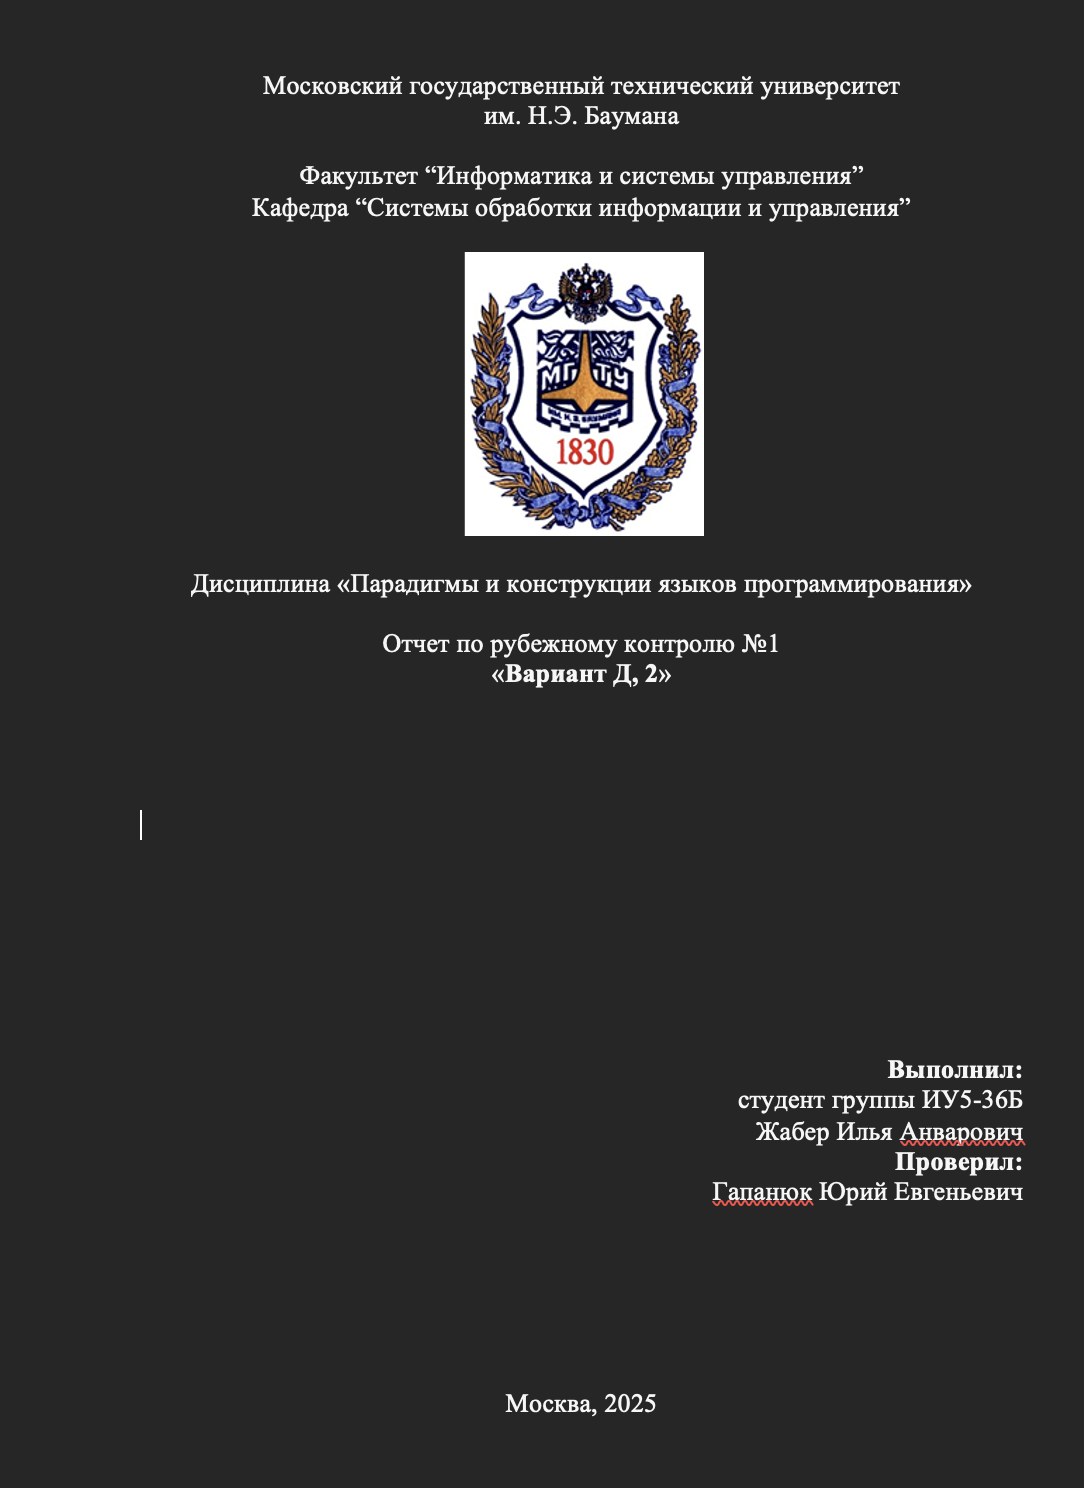

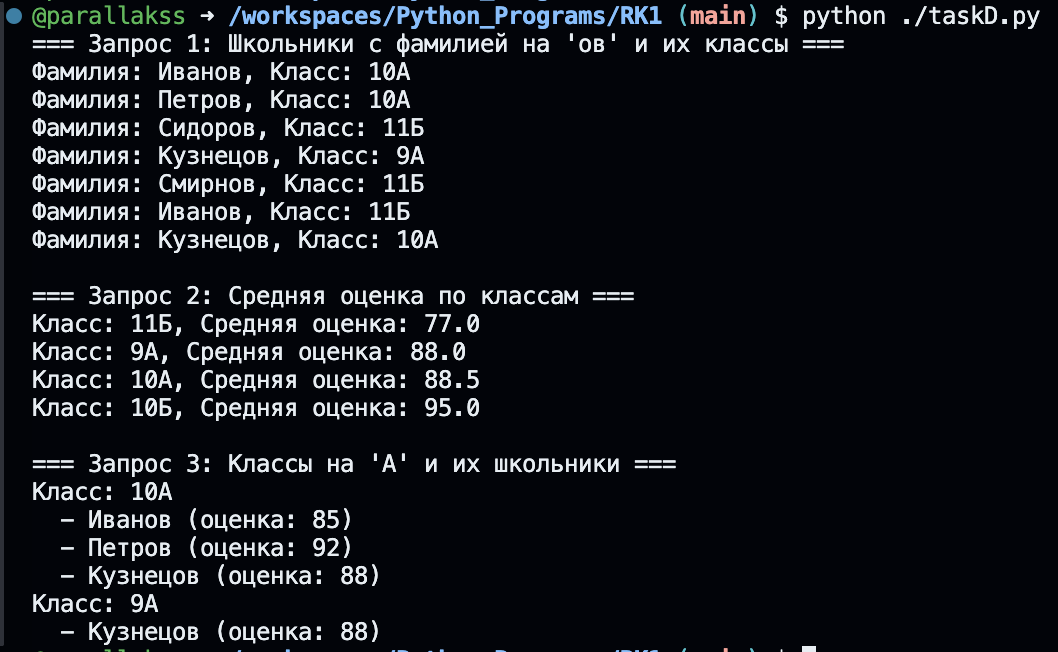

In [ ]:
class SchoolClass:
    def __init__(self, class_id, name):
        self.class_id = class_id
        self.name = name

    def __repr__(self):
        return f"Класс(ID={self.class_id}, Название='{self.name}')"


class Student:
    def __init__(self, student_id, last_name, grade, class_id):
        self.student_id = student_id
        self.last_name = last_name
        self.grade = grade
        self.class_id = class_id

    def __repr__(self):
        return f"Школьник(ID={self.student_id}, Фамилия='{self.last_name}', Оценка={self.grade}, ID_класса={self.class_id})"


class StudentInClass:
    def __init__(self, student_id, class_id):
        self.student_id = student_id
        self.class_id = class_id

    def __repr__(self):
        return f"Связь(Школьник_ID={self.student_id}, Класс_ID={self.class_id})"


# ===== ДАННЫЕ =====

classes = [
    SchoolClass(1, "10А"),
    SchoolClass(2, "11Б"),
    SchoolClass(3, "9А"),
    SchoolClass(4, "10Б"),
]

students = [
    Student(1, "Иванов", 85, 1),
    Student(2, "Петров", 92, 1),
    Student(3, "Сидоров", 78, 2),
    Student(4, "Кузнецов", 88, 3),
    Student(5, "Алексеев", 95, 4),
    Student(6, "Смирнов", 76, 2),
]

student_class_links = [
    StudentInClass(1, 1),
    StudentInClass(2, 1),
    StudentInClass(3, 2),
    StudentInClass(4, 3),
    StudentInClass(5, 4),
    StudentInClass(6, 2),
    StudentInClass(1, 2),
    StudentInClass(4, 1),
]


# ===== ЗАПРОСЫ =====

# Запрос 1: Школьники с фамилией на "ов" и их классы
def query_1():
    result = []
    seen = set()

    for link in student_class_links:
        student = next(s for s in students if s.student_id == link.student_id)
        school_class = next(c for c in classes if c.class_id == link.class_id)

        if student.last_name.endswith("ов"):
            pair = (student.last_name, school_class.name)
            if pair not in seen:
                seen.add(pair)
                result.append(pair)

    return result


# Запрос 2: Средняя оценка по классам
def query_2():
    class_grades = {}

    for student in students:
        class_grades.setdefault(student.class_id, []).append(student.grade)

    result = []
    for class_id, grades in class_grades.items():
        class_name = next(c.name for c in classes if c.class_id == class_id)
        avg = round(sum(grades) / len(grades), 1)
        result.append((class_name, avg))

    return sorted(result, key=lambda x: x[1])


# Запрос 3: Классы на русскую "А" и их школьники
def query_3():
    result = []
    russian_A = "А"

    for school_class in classes:
        if school_class.name.endswith(russian_A):
            student_ids = {
                link.student_id
                for link in student_class_links
                if link.class_id == school_class.class_id
            }

            class_students = [
                student for student in students
                if student.student_id in student_ids
            ]

            result.append((school_class.name, class_students))

    return result


# ===== ВЫВОД =====

print("=== Запрос 1: Школьники с фамилией на 'ов' и их классы ===")
for surname, class_name in query_1():
    print(f"Фамилия: {surname}, Класс: {class_name}")

print("\n=== Запрос 2: Средняя оценка по классам ===")
for class_name, avg_grade in query_2():
    print(f"Класс: {class_name}, Средняя оценка: {avg_grade}")

print("\n=== Запрос 3: Классы на 'А' и их школьники ===")
for class_name, students_list in query_3():
    print(f"Класс: {class_name}")
    for student in students_list:
        print(f"  - {student.last_name} (оценка: {student.grade})")
